# Logistic Regression

In [1]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score,roc_curve,roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [2]:
# Load cleaned dataset

df = pd.read_csv("/Users/sa19/Desktop/Phase2TLAB1/Cleaned_dateset.csv")

# Separate features and target
X =df.drop(["isFraud"],axis=1)

# Target : "isFraud" column
y = df["isFraud"]



In [3]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
# Check the shape of X_train and X_test
X_train.shape, X_test.shape

((4771965, 10), (1590655, 10))

In [5]:
# Check the data type
X_train.dtypes


Unnamed: 0                   int64
transaction_amount           int64
oldbalanceOrg                int64
newbalanceOrig               int64
oldbalanceDest               int64
newbalanceDest               int64
transaction_type_CASH_OUT    int64
transaction_type_DEBIT       int64
transaction_type_PAYMENT     int64
transaction_type_TRANSFER    int64
dtype: object

In [6]:
Model = LogisticRegression()
Model.fit (X_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Confusion Matrix

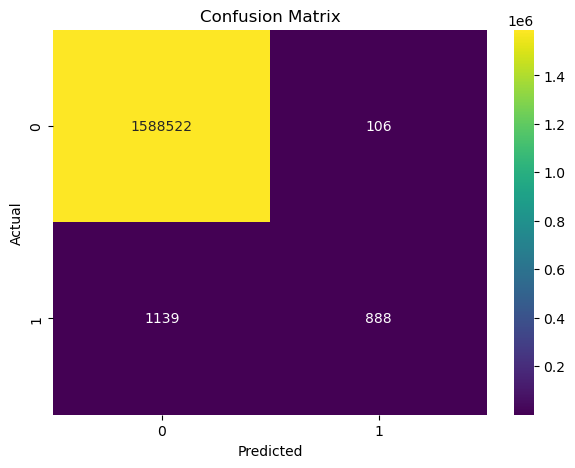

In [8]:
# Plot Confusion Maxtrix 
y_pred = Model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [12]:
# Predict and evaluate
predictions = Model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy Score: 0.9992173035636263

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588628
           1       0.89      0.44      0.59      2027

    accuracy                           1.00   1590655
   macro avg       0.95      0.72      0.79   1590655
weighted avg       1.00      1.00      1.00   1590655



Comment on CM

# Roc Curve

In [15]:
# Plot ROC Curve

probablities = Model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds  = roc_curve(y_test, y_pred)


